# step 1

Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import dataset

path = r'/Users/alisoncoolidge/Desktop/092022 Instacart Basket Analysis'

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prod_cust.pkl'))

In [4]:
df_ords_prods_cust.head()

Unnamed: 0.1  Unnamed: 0_x  order_id user_id  order_number  \
0             0             0   2539329       1             1   
1             1             1   2398795       1             2   
2             2             2    473747       1             3   
3             3             3   2254736       1             4   
4             4             4    431534       1             5   

   order_day_of_week  order_hour_of_day  days_since_prior_order  product_id  \
0                  2                  8                     NaN         196   
1                  3                  7                    15.0         196   
2                  3                 12                    21.0         196   
3                  4                  7                    29.0         196   
4                  4                 15                    28.0         196   

   add_to_cart_order  ...         frequency_flag  first_name last_name  \
0                  1  ...  Non-frequent customer       Linda    Nguyen   
1                  1  ...  Non-frequent customer       Linda    Nguyen   
2                  1  ...  Non-frequent customer       Linda    Nguyen   
3                  1  ...  Non-frequent customer       Linda    Nguyen   
4                  1  ...  Non-frequent customer       Linda    Nguyen   

   gender    state  age date_joined dependants fam_status income  
0  Female  Alabama   31   2/17/2019          3    married  40423  
1  Female  Alabama   31   2/17/2019          3    married  40423  
2  Female  Alabama   31   2/17/2019          3    married  40423  
3  Female  Alabama   31   2/17/2019          3    married  40423  
4  Female  Alabama   31   2/17/2019          3    married  40423  

[5 rows x 36 columns]

In [5]:
df_ords_prods_cust.shape

(32404859, 36)

In [6]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   Unnamed: 0.1                   int64   
 1   Unnamed: 0_x                   int64   
 2   order_id                       int64   
 3   user_id                        object  
 4   order_number                   int64   
 5   order_day_of_week              int64   
 6   order_hour_of_day              int64   
 7   days_since_prior_order         float64 
 8   product_id                     int64   
 9   add_to_cart_order              int64   
 10  reordered                      int64   
 11  Unnamed: 0_y                   int64   
 12  product_name                   object  
 13  aisle_id                       int64   
 14  department_id                  int64   
 15  prices                         float64 
 16  _merge                         category
 17  price_range_loc          

In [7]:
df_ords_prods_cust.describe()

Unnamed: 0.1  Unnamed: 0_x      order_id  order_number  \
count  3.240486e+07  3.240486e+07  3.240486e+07  3.240486e+07   
mean   1.709858e+06  1.709858e+06  1.710745e+06  1.714230e+01   
std    9.864575e+05  9.864575e+05  9.872988e+05  1.753532e+01   
min    0.000000e+00  0.000000e+00  2.000000e+00  1.000000e+00   
25%    8.556370e+05  8.556370e+05  8.559470e+05  5.000000e+00   
50%    1.709176e+06  1.709176e+06  1.711049e+06  1.100000e+01   
75%    2.565919e+06  2.565919e+06  2.565499e+06  2.400000e+01   
max    3.421081e+06  3.421081e+06  3.421083e+06  9.900000e+01   

       order_day_of_week  order_hour_of_day  days_since_prior_order  \
count       3.240486e+07       3.240486e+07            3.032876e+07   
mean        2.738867e+00       1.342515e+01            1.110408e+01   
std         2.090077e+00       4.246380e+00            8.779064e+00   
min         0.000000e+00       0.000000e+00            0.000000e+00   
25%         1.000000e+00       1.000000e+01            5.000000e+00   
50%         3.000000e+00       1.300000e+01            8.000000e+00   
75%         5.000000e+00       1.600000e+01            1.500000e+01   
max         6.000000e+00       2.300000e+01            3.000000e+01   

         product_id  add_to_cart_order     reordered  Unnamed: 0_y  \
count  3.240486e+07       3.240486e+07  3.240486e+07  3.240486e+07   
mean   2.559866e+04       8.352547e+00  5.895873e-01  2.560037e+04   
std    1.408400e+04       7.127071e+00  4.919087e-01  1.408555e+04   
min    1.000000e+00       1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.354400e+04       3.000000e+00  0.000000e+00  1.354400e+04   
50%    2.530200e+04       6.000000e+00  1.000000e+00  2.530300e+04   
75%    3.794700e+04       1.100000e+01  1.000000e+00  3.795100e+04   
max    4.968800e+04       1.450000e+02  1.000000e+00  4.969200e+04   

           aisle_id  department_id        prices     max_order     avg_price  \
count  3.240486e+07   3.240486e+07  3.239973e+07  3.240486e+07  3.240486e+07   
mean   7.119612e+01   9.919792e+00  7.790994e+00  3.305217e+01  1.198023e+01   
std    3.821139e+01   6.281485e+00  4.241809e+00  2.515525e+01  8.324227e+01   
min    1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    3.100000e+01   4.000000e+00  4.200000e+00  1.300000e+01  7.387298e+00   
50%    8.300000e+01   9.000000e+00  7.400000e+00  2.600000e+01  7.824786e+00   
75%    1.070000e+02   1.600000e+01  1.130000e+01  4.700000e+01  8.254023e+00   
max    1.340000e+02   2.100000e+01  2.500000e+01  9.900000e+01  2.500542e+04   

       median_days_since_prior_order           age    dependants        income  
count                   3.240485e+07  3.240486e+07  3.240486e+07  3.240486e+07  
mean                    1.039776e+01  4.946527e+01  1.501896e+00  9.943773e+04  
std                     7.131754e+00  1.848558e+01  1.118865e+00  4.305727e+04  
min                     0.000000e+00  1.800000e+01  0.000000e+00  2.590300e+04  
25%                     6.000000e+00  3.300000e+01  1.000000e+00  6.700400e+04  
50%                     8.000000e+00  4.900000e+01  2.000000e+00  9.661800e+04  
75%                     1.300000e+01  6.500000e+01  3.000000e+00  1.279120e+05  
max                     3.000000e+01  8.100000e+01  3.000000e+00  5.939010e+05

# step 2
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

RESPONSE: 

The combonation of customer first name, last name, state, gender, family status, and dependents is all PII. With this unique combonation of some or all of these variables someone's identity could easily be found and privacy violated. It would probably make sense to remove names at the very least since all the other data is relevant for analysis. 

In [8]:
# dropping first_name and last_name
df_ords_prods_cust = df_ords_prods_cust.drop(columns = ['first_name', 'last_name'])

In [9]:
# checking that columns were successfully dropped

df_ords_prods_cust.head()

Unnamed: 0.1  Unnamed: 0_x  order_id user_id  order_number  \
0             0             0   2539329       1             1   
1             1             1   2398795       1             2   
2             2             2    473747       1             3   
3             3             3   2254736       1             4   
4             4             4    431534       1             5   

   order_day_of_week  order_hour_of_day  days_since_prior_order  product_id  \
0                  2                  8                     NaN         196   
1                  3                  7                    15.0         196   
2                  3                 12                    21.0         196   
3                  4                  7                    29.0         196   
4                  4                 15                    28.0         196   

   add_to_cart_order  ...  spender_flag  median_days_since_prior_order  \
0                  1  ...   Low spender                           20.5   
1                  1  ...   Low spender                           20.5   
2                  1  ...   Low spender                           20.5   
3                  1  ...   Low spender                           20.5   
4                  1  ...   Low spender                           20.5   

          frequency_flag  gender    state  age date_joined dependants  \
0  Non-frequent customer  Female  Alabama   31   2/17/2019          3   
1  Non-frequent customer  Female  Alabama   31   2/17/2019          3   
2  Non-frequent customer  Female  Alabama   31   2/17/2019          3   
3  Non-frequent customer  Female  Alabama   31   2/17/2019          3   
4  Non-frequent customer  Female  Alabama   31   2/17/2019          3   

  fam_status income  
0    married  40423  
1    married  40423  
2    married  40423  
3    married  40423  
4    married  40423  

[5 rows x 34 columns]

# step 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [10]:
# creating regions

northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [11]:
# creating region flags with loc

df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(northeast), 'region'] = 'Northeast'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(midwest), 'region'] = 'Midwest'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(south), 'region'] = 'South'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(west), 'region'] = 'West'

In [12]:
# checking reguion frequency

df_ords_prods_cust['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# checking new column

df_ords_prods_cust.head(10)

Unnamed: 0.1  Unnamed: 0_x  order_id user_id  order_number  \
0             0             0   2539329       1             1   
1             1             1   2398795       1             2   
2             2             2    473747       1             3   
3             3             3   2254736       1             4   
4             4             4    431534       1             5   
5             5             5   3367565       1             6   
6             6             6    550135       1             7   
7             7             7   3108588       1             8   
8             8             8   2295261       1             9   
9             9             9   2550362       1            10   

   order_day_of_week  order_hour_of_day  days_since_prior_order  product_id  \
0                  2                  8                     NaN         196   
1                  3                  7                    15.0         196   
2                  3                 12                    21.0         196   
3                  4                  7                    29.0         196   
4                  4                 15                    28.0         196   
5                  2                  7                    19.0         196   
6                  1                  9                    20.0         196   
7                  1                 14                    14.0         196   
8                  1                 16                     0.0         196   
9                  4                  8                    30.0         196   

   add_to_cart_order  ...  median_days_since_prior_order  \
0                  1  ...                           20.5   
1                  1  ...                           20.5   
2                  1  ...                           20.5   
3                  1  ...                           20.5   
4                  1  ...                           20.5   
5                  1  ...                           20.5   
6                  1  ...                           20.5   
7                  2  ...                           20.5   
8                  4  ...                           20.5   
9                  1  ...                           20.5   

          frequency_flag  gender    state  age  date_joined dependants  \
0  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
1  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
2  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
3  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
4  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
5  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
6  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
7  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
8  Non-frequent customer  Female  Alabama   31    2/17/2019          3   
9  Non-frequent customer  Female  Alabama   31    2/17/2019          3   

  fam_status income region  
0    married  40423  South  
1    married  40423  South  
2    married  40423  South  
3    married  40423  South  
4    married  40423  South  
5    married  40423  South  
6    married  40423  South  
7    married  40423  South  
8    married  40423  South  
9    married  40423  South  

[10 rows x 35 columns]

In [14]:
# analyzing regional spending differences with crosstab

crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spender_flag'], dropna = False)

In [15]:
crosstab

spender_flag  High spender  Low spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559

The South has the highest number of spenders in both the high and low categories. With over 10 million low spenders and over 200k high spenders. 

# step 4
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
# creating activity flag using loc

df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] > 5, 'activity_flag'] = 'High Activity'
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] <= 5, 'activity_flag'] = 'Low Activity'

In [17]:
# checking freqeuency

df_ords_prods_cust['activity_flag'].value_counts(dropna = False)

High Activity    30171424
Low Activity      2233435
Name: activity_flag, dtype: int64

In [18]:
# checking new column

df_ords_prods_cust.head()

Unnamed: 0.1  Unnamed: 0_x  order_id user_id  order_number  \
0             0             0   2539329       1             1   
1             1             1   2398795       1             2   
2             2             2    473747       1             3   
3             3             3   2254736       1             4   
4             4             4    431534       1             5   

   order_day_of_week  order_hour_of_day  days_since_prior_order  product_id  \
0                  2                  8                     NaN         196   
1                  3                  7                    15.0         196   
2                  3                 12                    21.0         196   
3                  4                  7                    29.0         196   
4                  4                 15                    28.0         196   

   add_to_cart_order  ...         frequency_flag  gender    state  age  \
0                  1  ...  Non-frequent customer  Female  Alabama   31   
1                  1  ...  Non-frequent customer  Female  Alabama   31   
2                  1  ...  Non-frequent customer  Female  Alabama   31   
3                  1  ...  Non-frequent customer  Female  Alabama   31   
4                  1  ...  Non-frequent customer  Female  Alabama   31   

   date_joined  dependants fam_status income region  activity_flag  
0    2/17/2019           3    married  40423  South  High Activity  
1    2/17/2019           3    married  40423  South  High Activity  
2    2/17/2019           3    married  40423  South  High Activity  
3    2/17/2019           3    married  40423  South  High Activity  
4    2/17/2019           3    married  40423  South  High Activity  

[5 rows x 36 columns]

In [19]:
# creating low activity dataframe

df_low_activity = df_ords_prods_cust[df_ords_prods_cust['activity_flag'] == 'Low Activity']

In [20]:
df_low_activity

Unnamed: 0.1  Unnamed: 0_x  order_id user_id  order_number  \
1510              1744          1744    520620     120             1   
1511              1746          1746   3273029     120             3   
1512              1744          1744    520620     120             1   
1513              1746          1746   3273029     120             3   
1514              1744          1744    520620     120             1   
...                ...           ...       ...     ...           ...   
32404828       2766260       2766260   1947537  166751             3   
32404855       1101646       1101646    484769   66343             1   
32404856       1101647       1101647   1561557   66343             2   
32404857       1101648       1101648    276317   66343             3   
32404858       1101649       1101649   2922475   66343             4   

          order_day_of_week  order_hour_of_day  days_since_prior_order  \
1510                      3                 11                     NaN   
1511                      2                  8                    19.0   
1512                      3                 11                     NaN   
1513                      2                  8                    19.0   
1514                      3                 11                     NaN   
...                     ...                ...                     ...   
32404828                  4                  7                     0.0   
32404855                  6                 11                     NaN   
32404856                  1                 11                    30.0   
32404857                  6                 15                    19.0   
32404858                  1                 12                    30.0   

          product_id  add_to_cart_order  ...         frequency_flag  gender  \
1510             196                  2  ...       Regular customer  Female   
1511             196                  2  ...       Regular customer  Female   
1512           46149                  1  ...       Regular customer  Female   
1513           46149                  1  ...       Regular customer  Female   
1514           26348                  3  ...       Regular customer  Female   
...              ...                ...  ...                    ...     ...   
32404828       49001                  1  ...      Frequent customer  Female   
32404855       47210                  1  ...  Non-frequent customer  Female   
32404856       47210                  1  ...  Non-frequent customer  Female   
32404857       47210                  1  ...  Non-frequent customer  Female   
32404858       47210                  1  ...  Non-frequent customer  Female   

              state  age  date_joined  dependants fam_status income region  \
1510       Kentucky   54     3/2/2017           2    married  99219  South   
1511       Kentucky   54     3/2/2017           2    married  99219  South   
1512       Kentucky   54     3/2/2017           2    married  99219  South   
1513       Kentucky   54     3/2/2017           2    married  99219  South   
1514       Kentucky   54     3/2/2017           2    married  99219  South   
...             ...  ...          ...         ...        ...    ...    ...   
32404828     Oregon   38    8/17/2018           1    married  41766   West   
32404855  Tennessee   22    9/12/2017           3    married  46151  South   
32404856  Tennessee   22    9/12/2017           3    married  46151  South   
32404857  Tennessee   22    9/12/2017           3    married  46151  South   
32404858  Tennessee   22    9/12/2017           3    married  46151  South   

         activity_flag  
1510      Low Activity  
1511      Low Activity  
1512      Low Activity  
1513      Low Activity  
1514      Low Activity  
...                ...  
32404828  Low Activity  
32404855  Low Activity  
32404856  Low Activity  
32404857  Low Activity  
32404858  Low Activity  

[2233435 rows x 36 columns]

In [21]:
# exporting low activity sample

df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_sample.pkl'))

In [22]:
# creating a new data set of high activity sample only

df_high_activity = df_ords_prods_cust[df_ords_prods_cust['activity_flag'] == 'High Activity']

In [23]:
df_high_activity

Unnamed: 0.1  Unnamed: 0_x  order_id user_id  order_number  \
0                    0             0   2539329       1             1   
1                    1             1   2398795       1             2   
2                    2             2    473747       1             3   
3                    3             3   2254736       1             4   
4                    4             4    431534       1             5   
...                ...           ...       ...     ...           ...   
32404850       1768141       1768141   3308056  106143            22   
32404851       1768142       1768142   2988973  106143            23   
32404852       1768143       1768143       930  106143            24   
32404853       1768144       1768144    467253  106143            25   
32404854       1768145       1768145    156685  106143            26   

          order_day_of_week  order_hour_of_day  days_since_prior_order  \
0                         2                  8                     NaN   
1                         3                  7                    15.0   
2                         3                 12                    21.0   
3                         4                  7                    29.0   
4                         4                 15                    28.0   
...                     ...                ...                     ...   
32404850                  4                 20                    10.0   
32404851                  2                 22                     5.0   
32404852                  6                 12                     4.0   
32404853                  6                 16                     7.0   
32404854                  4                 23                     5.0   

          product_id  add_to_cart_order  ...         frequency_flag  gender  \
0                196                  1  ...  Non-frequent customer  Female   
1                196                  1  ...  Non-frequent customer  Female   
2                196                  1  ...  Non-frequent customer  Female   
3                196                  1  ...  Non-frequent customer  Female   
4                196                  1  ...  Non-frequent customer  Female   
...              ...                ...  ...                    ...     ...   
32404850       19675                  1  ...      Frequent customer    Male   
32404851       19675                  1  ...      Frequent customer    Male   
32404852       19675                  1  ...      Frequent customer    Male   
32404853       19675                  1  ...      Frequent customer    Male   
32404854       19675                  1  ...      Frequent customer    Male   

            state  age  date_joined  dependants fam_status income region  \
0         Alabama   31    2/17/2019           3    married  40423  South   
1         Alabama   31    2/17/2019           3    married  40423  South   
2         Alabama   31    2/17/2019           3    married  40423  South   
3         Alabama   31    2/17/2019           3    married  40423  South   
4         Alabama   31    2/17/2019           3    married  40423  South   
...           ...  ...          ...         ...        ...    ...    ...   
32404850   Hawaii   25    5/26/2017           0     single  53755   West   
32404851   Hawaii   25    5/26/2017           0     single  53755   West   
32404852   Hawaii   25    5/26/2017           0     single  53755   West   
32404853   Hawaii   25    5/26/2017           0     single  53755   West   
32404854   Hawaii   25    5/26/2017           0     single  53755   West   

          activity_flag  
0         High Activity  
1         High Activity  
2         High Activity  
3         High Activity  
4         High Activity  
...                 ...  
32404850  High Activity  
32404851  High Activity  
32404852  High Activity  
32404853  High Activity  
32404854  High Activity  

[30171424 rows x 36 columns]

In [24]:
# exporting high activity sample

df_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_sample.pkl'))

# step 5

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Profiles:
- Age_group_flag (Young adult = <30, Mid adult = 31-64, Senior = 65-100)
- Income_flag (Low income = <40k, Mid income = 40k-100k, High income = >100k)
- Family_flag (has kids= dependent >=1 , no_kids= dependent=0)
- Meal_prepper_flag (order DOW Saturday 0 or Sunday 1)

In [26]:
# creating age group flag

df_high_activity.loc[df_high_activity['age'] <= 30, 'age_group_flag'] = 'Young Adult'
df_high_activity.loc[(df_high_activity['age'] > 30) & (df_high_activity['age'] < 65), 'age_group_flag'] = 'Mid Adult'
df_high_activity.loc[df_high_activity['age'] > 65, 'age_group_flag'] = 'Senior'

In [27]:
# age group flag frequency
df_high_activity['age_group_flag'].value_counts()

Mid Adult      16038291
Senior          7536395
Young Adult     6143408
Name: age_group_flag, dtype: int64

In [29]:
# creating income group flag

df_high_activity.loc[df_high_activity['income'] <= 40000, 'income_group_flag'] = 'Low Income'
df_high_activity.loc[(df_high_activity['income'] > 40000) & (df_high_activity['income'] <= 100000), 'income_group_flag'] = 'Mid Income'
df_high_activity.loc[df_high_activity['income'] > 100000, 'income_group_flag'] = 'High income'

In [30]:
# income group flag frequency

df_high_activity['income_group_flag'].value_counts()

Mid Income     14752042
High income    13863645
Low Income      1555737
Name: income_group_flag, dtype: int64

In [32]:
# creating family group flag. 1 = family (kids), 0 = not family (no kids)

df_high_activity.loc[df_high_activity['dependants'] > 0, 'family_flag'] = 1
df_high_activity.loc[df_high_activity['dependants'] == 0, 'family_flag'] = 0

In [33]:
# family group flag frequency

df_high_activity['family_flag'].value_counts()

1.0    22632211
0.0     7539213
Name: family_flag, dtype: int64

In [35]:
# creating meal prepper group flag

df_high_activity.loc[df_high_activity['order_day_of_week'] <= 1, 'meal_prepper_flag'] = 'Meal Prepper'
df_high_activity.loc[df_high_activity['order_day_of_week'] >= 2, 'meal_prepper_flag'] = 'Not Meal Prepper'

In [36]:
# meal prepper group flag frequency

df_high_activity['meal_prepper_flag'].value_counts()

Not Meal Prepper    19149044
Meal Prepper        11022380
Name: meal_prepper_flag, dtype: int64

# step 6

Create an appropriate visualization to show the distribution of profiles.

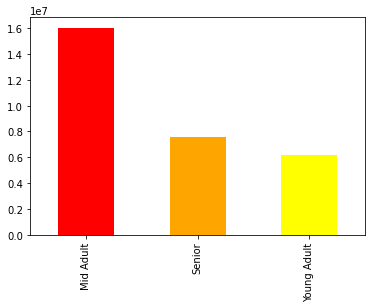

In [37]:
# age group bar chart

age_bar = df_high_activity['age_group_flag'].value_counts().plot.bar(color = ['red', 'orange', 'yellow'])

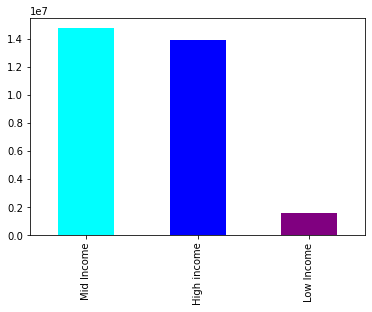

In [38]:
# income bar chart

income_bar = df_high_activity['income_group_flag'].value_counts().plot.bar(color = ['aqua', 'blue', 'purple'])

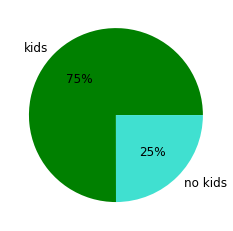

In [39]:
# family pie chart

family_pie = df_high_activity['family_flag'].value_counts().plot.pie(label='', labels=['kids', 'no kids'],autopct=('%1.f%%'), colors=['green','turquoise'], textprops={'fontsize': 12})


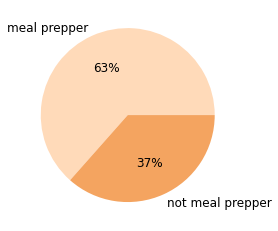

In [40]:
# meal prepper pie chart

mealprep_pie = df_high_activity['meal_prepper_flag'].value_counts().plot.pie(label='', labels=['meal prepper', 'not meal prepper'],autopct=('%1.f%%'), colors=['peachpuff','sandybrown'], textprops={'fontsize': 12})


In [41]:
# export age bar

age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_bar.png'))

In [42]:
# export income bar

income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_groups_bar.png'))

In [43]:
# export family pie

family_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_pie.png'))

In [44]:
# export meal prep pie

mealprep_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'meal_prep_pie.png'))

# step 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [45]:
# age group flag and usage frequency 

df_high_activity.groupby('age_group_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                        mean  min   max
age_group_flag                                         
Mid Adult                           9.710773  0.0  30.0
Senior                              9.690818  0.0  30.0
Young Adult                         9.722809  0.0  30.0

In [46]:
# age group flag and expenditure

df_high_activity.groupby('age_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
age_group_flag                     
Mid Adult       7.790676  1.0  25.0
Senior          7.793638  1.0  25.0
Young Adult     7.780394  1.0  25.0

In [47]:
# income group and usage frequency 

df_high_activity.groupby('income_group_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                           mean  min   max
income_group_flag                                         
High income                            9.645321  0.0  30.0
Low Income                            10.336312  0.0  30.0
Mid Income                             9.699241  0.0  30.0

In [48]:
# income group and expenditure

df_high_activity.groupby('income_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
income_group_flag                     
High income        7.950905  1.0  25.0
Low Income         6.504810  1.0  25.0
Mid Income         7.774356  1.0  25.0

In [49]:
# family flag and usage frequency 

df_high_activity.groupby('family_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
family_flag                                         
0.0                              9.680553  0.0  30.0
1.0                              9.716229  0.0  30.0

In [50]:
# family flag and expenditure

df_high_activity.groupby('family_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
family_flag                     
0.0          7.789036  1.0  25.0
1.0          7.790313  1.0  25.0

In [51]:
# meal prepper flag and usage frequency 

df_high_activity.groupby('meal_prepper_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                           mean  min   max
meal_prepper_flag                                         
Meal Prepper                           9.916340  0.0  30.0
Not Meal Prepper                       9.586997  0.0  30.0

In [52]:
# meal prepper flag and expenditure

df_high_activity.groupby('meal_prepper_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
meal_prepper_flag                    
Meal Prepper       7.80965  1.0  25.0
Not Meal Prepper   7.77868  1.0  25.0

# step 8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [53]:
# creating crosstab for age group and region

age_group_crosstab = pd.crosstab(df_high_activity['age_group_flag'], df_high_activity['region'], dropna = False)

In [54]:
age_group_crosstab

region          Midwest  Northeast    South     West
age_group_flag                                      
Mid Adult       3793262    2795374  5336406  4113249
Senior          1751284    1359035  2485453  1940623
Young Adult     1424148    1081643  2072383  1565234

In [55]:
# creating crosstab for income group and region

income_group_crosstab = pd.crosstab(df_high_activity['income_group_flag'], df_high_activity['region'], dropna = False)

In [56]:
income_group_crosstab

region             Midwest  Northeast    South     West
income_group_flag                                      
High income        3315516    2457212  4552410  3538507
Low Income          360797     272252   533978   388710
Mid Income         3393809    2594887  4963771  3799575

In [57]:
# creating crosstab for family flag and region

family_flag_crosstab = pd.crosstab(df_high_activity['family_flag'], df_high_activity['region'], dropna = False)

In [58]:
family_flag_crosstab

region       Midwest  Northeast    South     West
family_flag                                      
0.0          1773970    1317139  2516780  1931324
1.0          5296152    4007212  7533379  5795468

In [59]:
# creating crosstab for meal prepper flag and region

meal_prepper_flag_crosstab = pd.crosstab(df_high_activity['meal_prepper_flag'], df_high_activity['region'], dropna = False)

In [60]:
meal_prepper_flag_crosstab

region             Midwest  Northeast    South     West
meal_prepper_flag                                      
Meal Prepper       2582439    1945323  3666697  2827921
Not Meal Prepper   4487683    3379028  6383462  4898871

# step 9

Produce suitable charts to illustrate your results and export them in your project folder.

In [61]:
# creating crosstab for age group by region
age_region_bar = pd.crosstab(df_high_activity['region'], columns = df_high_activity['age_group_flag'])

# creating cross tab to display labels
age_region_bar_labels = pd.crosstab(df_high_activity['region'], columns = df_high_activity['age_group_flag'])

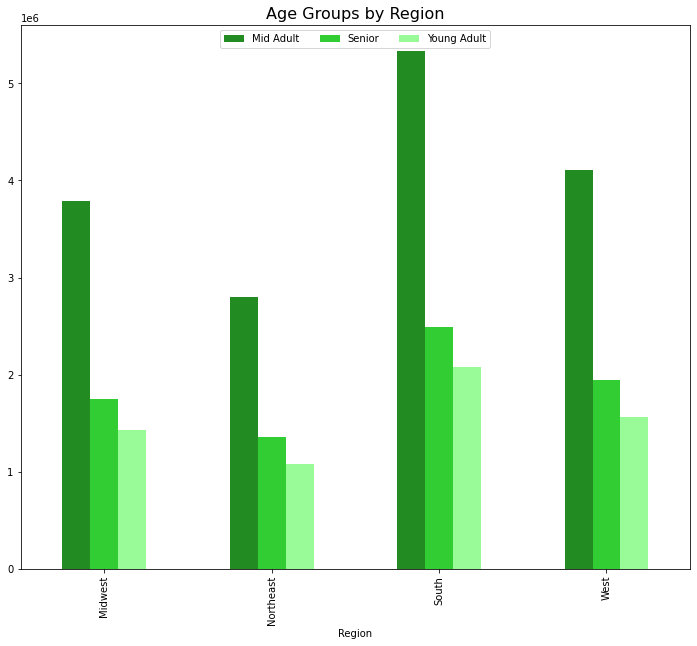

In [62]:
# creating bar chart for age group and region

age_region_bar = age_region_bar.plot(kind ='bar', stacked = False, color = ['forestgreen','limegreen','palegreen'], figsize = (12,10))
plt.title('Age Groups by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [63]:
# exporting age group by region bar chart

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

In [84]:
# creating crosstab for income group by region
income_region_bar = pd.crosstab(df_high_activity['region'], columns = df_high_activity['income_group_flag'])

# creating cross tab to display labels
income_region_bar_labels = pd.crosstab(df_high_activity['region'], columns = df_high_activity['income_group_flag'])

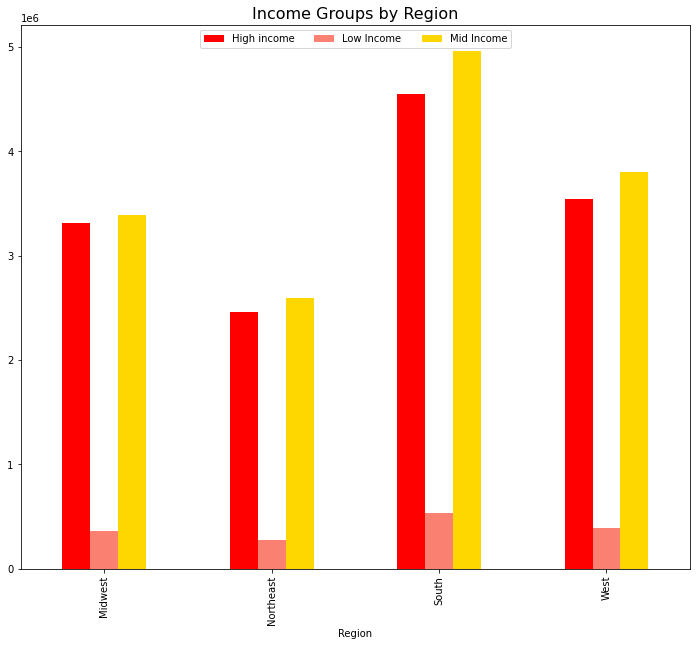

In [85]:
# creating bar chart for income group and region

income_region_bar = income_region_bar.plot(kind ='bar', stacked = False, color = ['red','salmon','gold'], figsize = (12,10)),
plt.title('Income Groups by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [ ]:
# exporting income group by region bar chart

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))

In [89]:
# creating crosstab for family group by region
family_region_bar = pd.crosstab(df_high_activity['region'], columns = df_high_activity['family_flag'])

# creating cross tab to display labels
family_region_bar_labels = pd.crosstab(df_high_activity['region'], columns = df_high_activity['family_flag'])

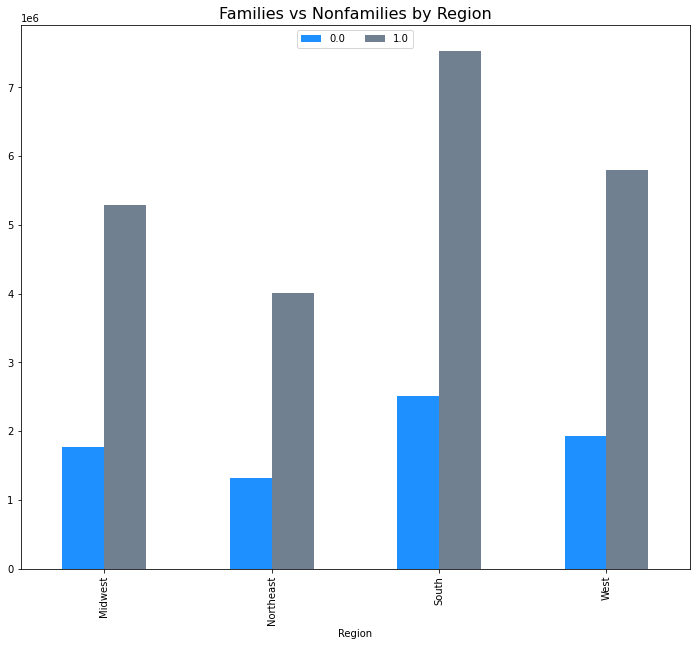

In [90]:
# creating bar chart for family group and region

family_region_bar = family_region_bar.plot(kind ='bar', stacked = False, color = ['dodgerblue','slategray'], figsize = (12,10))
plt.title('Families vs Nonfamilies by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [91]:
# exporting age group by region bar chart

family_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_region_bar.png'))

In [96]:
# creating crosstab for family group by region
mealprep_region_bar = pd.crosstab(df_high_activity['region'], columns = df_high_activity['meal_prepper_flag'])

# creating cross tab to display labels
mealprep_region_bar_labels = pd.crosstab(df_high_activity['region'], columns = df_high_activity['meal_prepper_flag'])

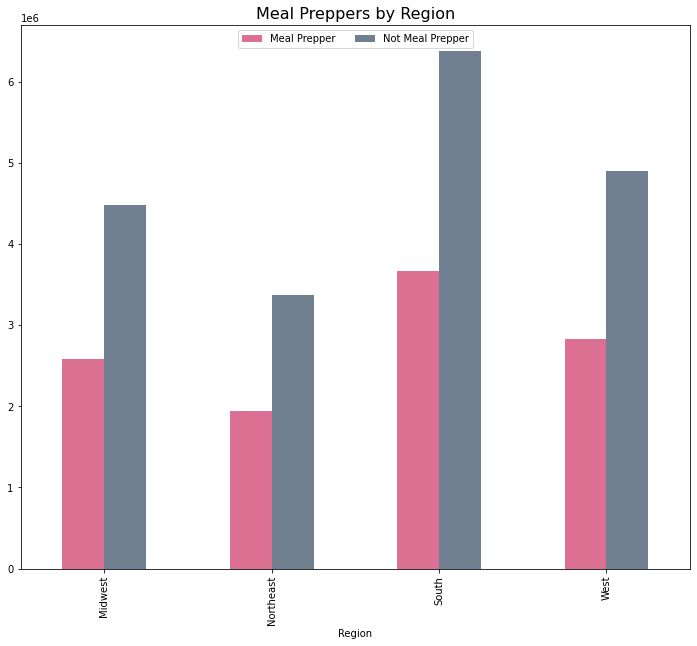

In [97]:
# creating bar chart for meal prepper group and region

mealprep_region_bar = mealprep_region_bar.plot(kind ='bar', stacked = False, color = ['palevioletred','slategray'], figsize = (12,10))
plt.title('Meal Preppers by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [98]:
# exporting age group by region bar chart

mealprep_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mealprep_region_bar.png'))

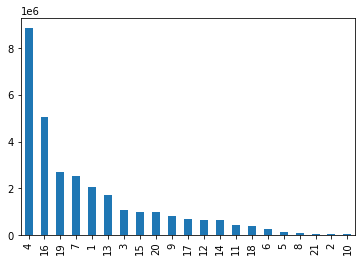

In [101]:
# creating department bar chart

department_bar = df_high_activity['department_id'].value_counts().plot.bar()

In [102]:
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))